<H3>GEORGIA COUNTY CAPSTONE STUDY</H3>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import seaborn as sns
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl

# import k-means from clustering stage
from sklearn.cluster import KMeans
import scipy.stats as stats
import os
import random

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 112kB 6.5MB/s eta 0:00:01
Libraries imported.


In [2]:
#for html
! pip install lxml

     |████████████████████████████████| 5.5MB 8.0MB/s eta 0:00:01     |██████████████▉                 | 2.6MB 8.0MB/s eta 0:00:01B/s eta 0:00:01MB/s eta 0:00:01


In [3]:
#statistical package
pip install statannot

Note: you may need to restart the kernel to use updated packages.


In [4]:
#for graphs
%matplotlib inline
print(plt.style.available)
mpl.style.use(['fivethirtyeight']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
#geordet: all the non lat details, 159 counties
geordet = pd.read_csv('geordet.csv')
geordet['vote ratio blue over red'] = geordet['Total Votes Blue']/geordet['Total Votes Red']
geordet.head()
geordet.loc[geordet['vote ratio blue over red'] <1.000, 'Skew'] = 'Red' 
geordet.loc[geordet['vote ratio blue over red'] >1.000, 'Skew'] = 'Blue' 
geordet.head(30)
geordet.head()

,County,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red,Skew
0,Appling,6526,1779,8305,0.272602,Red
1,Atkinson,2300,825,3125,0.358696,Red
2,Bacon,4018,625,4643,0.155550,Red
3,Baker,897,652,1549,0.726867,Red
4,Baldwin,8903,9140,18043,1.026620,Blue


In [6]:
#looks like total number of votes and political preference don't correlate
geordet[["Totall minus liber","Total Votes Blue"]].corr()

,Totall minus liber,Total Votes Blue
Totall minus liber,1.00000,0.97498
Total Votes Blue,0.97498,1.00000


In [7]:
#georgiall: all the counties also with lat long
georgiall = pd.read_csv('us-county-boundaries.csv',sep=';')
georgiall.head()
georgiall.rename(columns={"Geo Point":"Lat","NAME":"County"},inplace=True)
georgiall[['Lat','Long']] = georgiall['Lat'].str.split(',',expand=True)
georgiall.head()
georgiall.dtypes
georgiall.head()

,Lat,Geo Shape,STATEFP,COUNTYFP,COUNTYNS,GEOID,County,NAMELSAD,STUSAB,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,STATE_NAME,COUNTYFP NOZERO,Long
0,32.1217203314,"{""type"": ""Polygon"", ""coordinates"": [[[-82.4636...",13,279,345220,13279,Toombs,Toombs County,GA,6,H1,G4020,NaN,47080.0,NaN,A,942778662,18086323,32.117812,-82.330626,Georgia,279,-82.3312929099
1,31.5291972743,"{""type"": ""Polygon"", ""coordinates"": [[[-84.8099...",13,37,344074,13037,Calhoun,Calhoun County,GA,6,H1,G4020,NaN,NaN,NaN,A,726191502,8271470,31.521279,-84.626289,Georgia,37,-84.6245076946
2,34.6463905658,"{""type"": ""Polygon"", ""coordinates"": [[[-83.8296...",13,311,326781,13311,White,White County,GA,6,H1,G4020,NaN,NaN,NaN,A,623522401,3919460,34.643776,-83.743417,Georgia,311,-83.747108233
3,31.5492717947,"{""type"": ""Polygon"", ""coordinates"": [[[-83.0136...",13,69,347456,13069,Coffee,Coffee County,GA,6,H1,G4020,NaN,20060.0,NaN,A,1533928847,26927255,31.549245,-82.844940,Georgia,69,-82.8492009827
4,33.7819451825,"{""type"": ""Polygon"", ""coordinates"": [[[-82.8102...",13,317,351265,13317,Wilkes,Wilkes County,GA,6,H1,G4020,NaN,NaN,NaN,A,1216001409,11896927,33.779031,-82.747921,Georgia,317,-82.743226753


In [8]:
#georgiallsmall:only take the categories from georgiall you need
georgiallsmall = georgiall[['Lat','Long','County']]
georgiallsmall.shape
georgiallsmall.reset_index(drop=True)
georgiallsmall.astype({'Lat':'float64','Long':'float64'}).dtypes
georgiallsmall.head()

,Lat,Long,County
0,32.1217203314,-82.3312929099,Toombs
1,31.5291972743,-84.6245076946,Calhoun
2,34.6463905658,-83.747108233,White
3,31.5492717947,-82.8492009827,Coffee
4,33.7819451825,-82.743226753,Wilkes


In [9]:
georgiallsmall.shape

(159, 3)

In [10]:
geordet.shape

(159, 6)

In [11]:
#merge dfs to make the one you want which is "new". create a dataframe called 'newclay'
#which has the smallest counties for use if needed.
#process new and newclay, but new will be the one used.

new = geordet.merge(georgiallsmall,on = 'County')
new.head(20)
#select the small voting population counties that are around clay's voting pop size
newclay = new[new['Totall minus liber'].between(0,2500)]
newclay.sort_values(by='Totall minus liber')
newclay.reset_index(drop=True)

,County,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red,Skew,Lat,Long
0,Baker,897,652,1549,0.726867,Red,31.326183927,-84.4446694741
1,Calhoun,923,1259,2182,1.364030,Blue,31.5291972743,-84.6245076946
2,Chattahoochee,880,667,1547,0.757955,Red,32.346971275,-84.7870462059
3,Clay,637,790,1427,1.240188,Blue,31.6262755156,-84.9801029119
4,Echols,1256,167,1423,0.132962,Red,30.7100896074,-82.8939351883
5,Glascock,1403,155,1558,0.110478,Red,33.2292799721,-82.6107022318
6,Quitman,604,497,1101,0.822848,Red,31.8673305599,-85.0187841576
7,Schley,1800,462,2262,0.256667,Red,32.2616858077,-84.3147208166
8,Stewart,801,1182,1983,1.475655,Blue,32.0784621843,-84.8352023744
9,Taliaferro,360,561,921,1.558333,Blue,33.5660908408,-82.8787644687


In [12]:
#Using geocode and Nominatim to locate Georgia
address = 'Georgia,USA'

geolocator = Nominatim(user_agent="ga_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates for Georgia are {}, {}.'.format(latitude, longitude))

The geographical coordinates for Georgia are 32.3293809, -83.1137366.


In [13]:
#changing data types of lat and long to float here..for compatability
newclay.Lat = newclay.Lat.astype('float')
newclay.Long = newclay.Long.astype('float')
new.Lat = new.Lat.astype('float')
new.Long = new.Long.astype('float')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
new.dtypes

County                       object
Total Votes Red               int64
Total Votes Blue              int64
Totall minus liber            int64
vote ratio blue over red    float64
Skew                         object
Lat                         float64
Long                        float64
dtype: object

In [15]:
#interesting, but the mean isn't a very representative measure in tandem with the votes number almost half to half. we should go back
#to the stats describe to see how either total votes category pans out, given this mean.
geordet.sort_values('Skew').mean()

Total Votes Red             15438.547170
Total Votes Blue            15496.157233
Totall minus liber          30934.704403
vote ratio blue over red        0.710963
dtype: float64

In [16]:
#before we get much further into Georgia, let's reset index on new clay,a dataframe if we need use 
#the smallest counties.
newclay = newclay.reset_index(drop=True)
newclay.head()
#just doing a location for clay county
newclay.loc[3,'County']

'Clay'

Text(0, 0.5, 'Count')

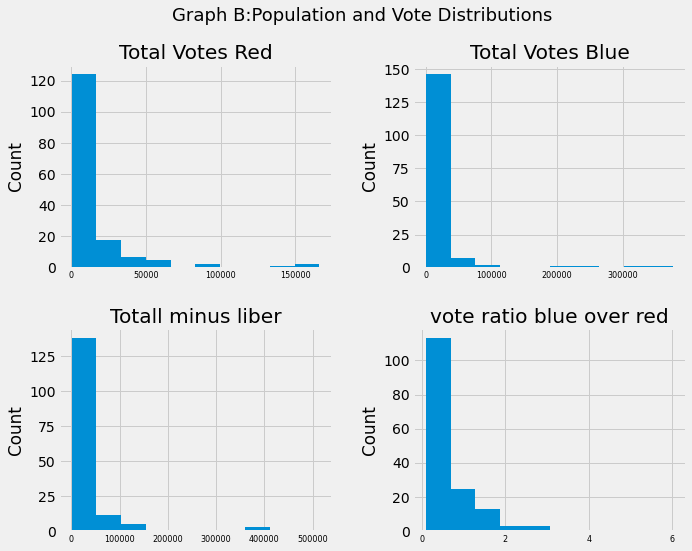

In [17]:
#profiling the spread of population, skew, and vote in the georgia counties
ax = geordet.hist(xlabelsize='8',figsize=(10,8))
plt.suptitle('Graph B:Population and Vote Distributions',fontsize='18')
plt.ylabel('Count')
ax[0][0].set_ylabel('Count')
ax[0][1].set_ylabel('Count')
ax[1][0].set_ylabel('Count')

Text(0, 0.5, 'Count')

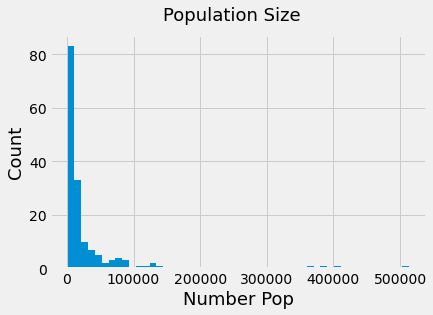

In [18]:
#further binning pop size reveals many distributed but distinct size groups
ax2 = geordet['Totall minus liber'].hist(bins=50)
ax2
plt.suptitle('Population Size',fontsize='18')
plt.xlabel('Number Pop',fontsize='18')
plt.ylabel('Count',fontsize='18')

In [19]:
Georgia = folium.Map(location = [32.3293809, -83.1137366])
tiles = 'openstreetmap'
zoom_start = 10
Georgia

In [20]:
# create map of Georgia Counties using latitude and longitude values
map_georgia = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(new['Lat'], new['Long'], new['County']):
    label = '{}'.format('County')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_georgia)  
    
map_georgia

In [21]:
#confirming county and column location
newclay.columns.get_loc('Skew')
newclay.columns.get_loc('County')
georgiall[georgiall['County']=='Fulton']
georgiall.loc[89,'Lat']

'33.7902830104'

In [22]:
new[new['County']=='Fulton']
new.loc[59,'County']
new.head()

,County,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red,Skew,Lat,Long
0,Appling,6526,1779,8305,0.272602,Red,31.749280,-82.288984
1,Atkinson,2300,825,3125,0.358696,Red,31.297108,-82.879993
2,Bacon,4018,625,4643,0.155550,Red,31.553675,-82.452685
3,Baker,897,652,1549,0.726867,Red,31.326184,-84.444669
4,Baldwin,8903,9140,18043,1.026620,Blue,33.069276,-83.249591


In [23]:
CLIENT_ID = 'WCMZT4ZVROR1NIMWHBRADGKXXRH4NV3O3OT44IPHSW2WD20D' # your Foursquare ID
CLIENT_SECRET = 'Q2BKFTUFGE4OXKWQSOO12XEZKVU1RHXPF1RUG1EMCG2MZPI3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 5000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WCMZT4ZVROR1NIMWHBRADGKXXRH4NV3O3OT44IPHSW2WD20D
CLIENT_SECRET:Q2BKFTUFGE4OXKWQSOO12XEZKVU1RHXPF1RUG1EMCG2MZPI3


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes,longitudes):
        print()
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
       # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['County', 
                  'Lat', 
                  'Long', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
georgia_venues = getNearbyVenues(names=new['County'],
                                  latitudes=new['Lat'],
                                  longitudes=new['Long'])

In [26]:
georgia_venues.head()
gv = georgia_venues.to_csv(r'gv.csv',index='False')
georgia_venues.shape
georgia_venues['County'].value_counts()
len(georgia_venues['County'].unique())
len(georgia_venues['Venue Category'].unique())
georgia_venues.shape

(4506, 7)

In [27]:
#check the results of this query: which venue categories come up most?
gv = pd.read_csv('gv.csv')
gv.head()
gv['Venue Category'].value_counts()

Fast Food Restaurant                        328
Discount Store                              256
Pizza Place                                 214
Sandwich Place                              193
Mexican Restaurant                          187
American Restaurant                         185
Grocery Store                               140
Fried Chicken Joint                         134
Gas Station                                 134
Pharmacy                                    126
Breakfast Spot                              108
Ice Cream Shop                               90
Coffee Shop                                  84
BBQ Joint                                    82
Convenience Store                            80
Hotel                                        67
Seafood Restaurant                           65
Department Store                             57
Italian Restaurant                           51
Park                                         47
Southern / Soul Food Restaurant         

<a id ='one'>One hot encoding to analyze venue categories</a>

In [28]:
# one hot encoding for venue categories
georgia_onehot = pd.get_dummies(georgia_venues[['Venue Category']], prefix="", prefix_sep="")
georgia_onehot.head()
georgia_onehot = georgia_onehot.loc[:,~georgia_onehot.columns.duplicated()]
georgia_onehot.shape

(4506, 282)

In [31]:
georgia_onehot['County'] = georgia_venues['County']
georgia_onehot.columns.get_loc('County')
# move county column to the first column
fixed_columns = [georgia_onehot.columns[282]] + list(georgia_onehot.columns[:282])
georgia_onehot = georgia_onehot[fixed_columns]
georgia_onehot.head()

,County,ATM,Adult Boutique,African Restaurant,Airport,Airport Gate,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,City,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Baseball Diamond,College Basketball Court,College Bookstore,College Gym,Comic Shop,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Spot,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Motorsports Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Non-Profit,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Supply Store,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Post Office,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Club,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Travel & Transport,Truck Stop,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Winery,Wings Jo

In [32]:
#we see there are 300 unique categories across Georgia's counties.
len(georgia_venues['Venue Category'].unique())

282

In [33]:
georgia_grouped = georgia_onehot.groupby('County').mean().reset_index()

In [34]:
georgia_grouped.head()

,County,ATM,Adult Boutique,African Restaurant,Airport,Airport Gate,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,City,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Baseball Diamond,College Basketball Court,College Bookstore,College Gym,Comic Shop,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Spot,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Motorsports Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Non-Profit,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Supply Store,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Post Office,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Club,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Travel & Transport,Truck Stop,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Winery,Wings Jo

In [35]:
georgia_grouped.shape

(148, 283)

In [36]:
num_top_venues = 5

for county in georgia_grouped['County']:
    print("----"+county+"----")
    temp = georgia_grouped[georgia_grouped['County'] == county].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Appling----
                   venue  freq
0     Seafood Restaurant   1.0
1                    ATM   0.0
2                   Park   0.0
3           Outlet Store   0.0
4  Outdoors & Recreation   0.0


----Atkinson----
                  venue  freq
0  Fast Food Restaurant  0.25
1           Gas Station  0.25
2         Grocery Store  0.25
3        Discount Store  0.25
4                Office  0.00


----Bacon----
                  venue  freq
0                  Food  0.18
1  Fast Food Restaurant  0.12
2           Gas Station  0.12
3  Gym / Fitness Center  0.06
4         Grocery Store  0.06


----Baker----
                   venue  freq
0                   Park   0.5
1        Nature Preserve   0.5
2             Non-Profit   0.0
3  Outdoors & Recreation   0.0
4   Outdoor Supply Store   0.0


----Baldwin----
                  venue  freq
0  Fast Food Restaurant  0.09
1         Grocery Store  0.06
2        Sandwich Place  0.05
3   American Restaurant  0.05
4        Discount Store  0.05


-

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['County']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
counties_venues_sorted = pd.DataFrame(columns=columns)
counties_venues_sorted['County'] = georgia_grouped['County']

for ind in np.arange(georgia_grouped.shape[0]):
    counties_venues_sorted.iloc[ind, 1:] = return_most_common_venues(georgia_grouped.iloc[ind, :], num_top_venues)

counties_venues_sorted.head()

,County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Appling,Seafood Restaurant,Yoga Studio,Eye Doctor,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Fishing Spot
1,Atkinson,Discount Store,Fast Food Restaurant,Gas Station,Grocery Store,Flower Shop,Field,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market
2,Bacon,Food,Fast Food Restaurant,Gas Station,Ice Cream Shop,Diner,Grocery Store,BBQ Joint,Sandwich Place,Gym / Fitness Center,Pharmacy
3,Baker,Park,Nature Preserve,Yoga Studio,Fishing Spot,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Flea Market
4,Baldwin,Fast Food Restaurant,Grocery Store,American Restaurant,Discount Store,Sandwich Place,Breakfast Spot,Pharmacy,Pizza Place,Bar,Department Store


<a id ='set'>SETTING THE K CLUSTERS</a>

In [39]:
# set number of clusters
kclusters = 5

georgia_grouped_clustering = georgia_grouped.drop('County', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(georgia_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
georgia_grouped_clustering.head()

,ATM,Adult Boutique,African Restaurant,Airport,Airport Gate,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,City,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Baseball Diamond,College Basketball Court,College Bookstore,College Gym,Comic Shop,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Spot,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Motorsports Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Non-Profit,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Supply Store,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Post Office,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Road,Rock Club,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Travel & Transport,Truck Stop,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Winery,Wings Joint,Wom

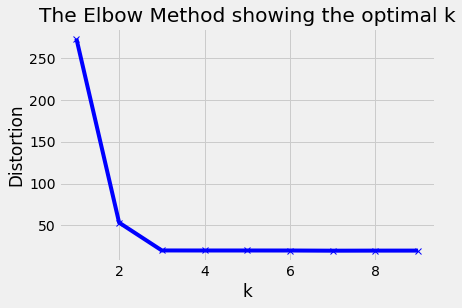

In [40]:
#ELBOW method is inconclusive; we begin with k = 5 clusters
#with the long term plan to iterate with 3 and 4 clsuters.

from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(georgia_grouped_clustering)
    #kmeanModel.fit(georgia_grouped_clustering)
    distortions.append(sum(np.min(cdist(georgia_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / georgia_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [41]:
counties_venues_sorted.head()

,County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Appling,Seafood Restaurant,Yoga Studio,Eye Doctor,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Fishing Spot
1,Atkinson,Discount Store,Fast Food Restaurant,Gas Station,Grocery Store,Flower Shop,Field,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market
2,Bacon,Food,Fast Food Restaurant,Gas Station,Ice Cream Shop,Diner,Grocery Store,BBQ Joint,Sandwich Place,Gym / Fitness Center,Pharmacy
3,Baker,Park,Nature Preserve,Yoga Studio,Fishing Spot,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Flea Market
4,Baldwin,Fast Food Restaurant,Grocery Store,American Restaurant,Discount Store,Sandwich Place,Breakfast Spot,Pharmacy,Pizza Place,Bar,Department Store


In [42]:
# add clustering labels
counties_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [43]:
counties_venues_sorted.head(20)
counties_venues_sorted.head()

,Cluster Labels,County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Appling,Seafood Restaurant,Yoga Studio,Eye Doctor,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Fishing Spot
1,0,Atkinson,Discount Store,Fast Food Restaurant,Gas Station,Grocery Store,Flower Shop,Field,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market
2,2,Bacon,Food,Fast Food Restaurant,Gas Station,Ice Cream Shop,Diner,Grocery Store,BBQ Joint,Sandwich Place,Gym / Fitness Center,Pharmacy
3,2,Baker,Park,Nature Preserve,Yoga Studio,Fishing Spot,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Flea Market
4,2,Baldwin,Fast Food Restaurant,Grocery Store,American Restaurant,Discount Store,Sandwich Place,Breakfast Spot,Pharmacy,Pizza Place,Bar,Department Store


<H2>Creating the Dataframe and the Map FOR 5000 METERS</H2>

In [44]:
georgia_merged = georgiallsmall
# merge the postal code lat long dataframe with the top ten venue data to add latitude/longitude for each neighborhood
georgia_merged = georgia_merged.join(counties_venues_sorted.set_index('County'), on='County')

georgia_merged.head() # check the last columns!
georgia_merged.dropna().head()
#dropped all the non Toronto boroughs here, since they show up as NaN; hence the order shown isn't 0 to end
georgia_merged = georgia_merged.dropna()
georgia_merged['Cluster Labels']=georgia_merged['Cluster Labels'].astype(int)
georgia_merged['Lat'] = georgia_merged['Lat'].astype(float)
georgia_merged['Long'] = georgia_merged['Long'].astype(float)

georgia_merged.sort_values(by='Cluster Labels').head()

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
76,33.880648,-83.080703,Oglethorpe,0,Discount Store,Convenience Store,Department Store,Southern / Soul Food Restaurant,Fast Food Restaurant,Park,Grocery Store,Wings Joint,Deli / Bodega,Dance Studio
137,31.037894,-83.062653,Lanier,0,Discount Store,Fast Food Restaurant,American Restaurant,Mexican Restaurant,Sandwich Place,Field,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market
20,31.602283,-83.276375,Irwin,0,Grocery Store,American Restaurant,Golf Course,Gym / Fitness Center,Sandwich Place,Discount Store,Fried Chicken Joint,Farm,Food & Drink Shop,Food
136,32.261686,-84.314721,Schley,0,Grocery Store,Pizza Place,Sandwich Place,Discount Store,Convenience Store,Deli / Bodega,Farm,Food Truck,Food Service,Food Court
52,31.805596,-82.636941,Jeff Davis,0,Grocery Store,Flea Market,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Fishing Spot,Yoga Studio,Farm


In [45]:
#save csv copies
georgia_mergedplus = georgia_merged.merge(geordet, on = 'County')
georgia_mergedplus.head()
georgia_mergedplus = georgia_mergedplus.to_csv(r'georgiamergedanal.csv',sep=',',index='False')

In [46]:
# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(georgia_merged['Lat'], georgia_merged['Long'], georgia_merged['County'], georgia_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<H2>GEORGIA 5000 METERS ANALYSIS</H2>

Cluster 1:Music Venues and Food Trucks

In [47]:
gc0 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 0, georgia_merged.columns[[0,1,2,3,4,5,6] + list(range(5, georgia_merged.shape[1]))]]
gc0['1st Most Common Venue'].value_counts()
#cluster0 is red

Discount Store                15
Grocery Store                  9
Convenience Store              4
Fast Food Restaurant           2
Health Food Store              1
Moving Target                  1
Food                           1
Construction & Landscaping     1
Name: 1st Most Common Venue, dtype: int64

Cluster 1: (purple):Major cluster. Top five venues are listed below.

In [48]:
gc1 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 1, georgia_merged.columns[[0,1,2,3,4] + list(range(5, georgia_merged.shape[1]))]]
gc1.shape
gc1['1st Most Common Venue'].value_counts().head()
#cluster 1 is purple

Moving Target    3
Name: 1st Most Common Venue, dtype: int64

Cluster 2:Farms. Rural.

In [49]:
gc2 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 2, georgia_merged.columns[[0,1,2,3,4] + list(range(5, georgia_merged.shape[1]))]]
gc2
#gc2 cluster is blue

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,32.121720,-82.331293,Toombs,2,Miscellaneous Shop,Wine Bar,Home Service,Business Service,Bakery,Flea Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market
2,34.646391,-83.747108,White,2,Trail,Construction & Landscaping,Campground,Ice Cream Shop,Mountain,Brewery,Burger Joint,Bed & Breakfast,Toy / Game Store,Farm
3,31.549272,-82.849201,Coffee,2,Pizza Place,Discount Store,Tex-Mex Restaurant,Café,Gym,Fast Food Restaurant,Sandwich Place,Bakery,Pharmacy,Gas Station
4,33.781945,-82.743227,Wilkes,2,Wings Joint,Post Office,Plaza,American Restaurant,Sandwich Place,Yoga Studio,Fish Market,Farm,Farmers Market,Fast Food Restaurant
5,33.287851,-83.957170,Butts,2,Discount Store,Fast Food Restaurant,Mexican Restaurant,Pizza Place,American Restaurant,Fried Chicken Joint,Diner,Chinese Restaurant,Golf Course,Steakhouse
6,34.572189,-84.002656,Lumpkin,2,Convenience Store,American Restaurant,Seafood Restaurant,BBQ Joint,Mexican Restaurant,Pizza Place,Coffee Shop,Museum,Bed & Breakfast,Pharmacy
7,33.993196,-83.712755,Barrow,2,Fast Food Restaurant,Gas Station,Pizza Place,Discount Store,American Restaurant,Sandwich Place,Mexican Restaurant,Fried Chicken Joint,Grocery Store,Pharmacy
8,33.033510,-85.028337,Troup,2,Pizza Place,Fast Food Restaurant,Sandwich Place,Grocery Store,Discount Store,Fried Chicken Joint,Pharmacy,BBQ Joint,Department Store,Japanese Restaurant
9,31.973951,-81.093970,Chatham,2,Department Store,Mexican Restaurant,American Restaurant,Cosmetics Shop,Seafood Restaurant,Furniture / Home Store,Southern / Soul Food Restaurant,Breakfast Spot,Ice Cream Shop,Fried Chicken Joint
10,33.555049,-83.850187,Newton,2,Gas Station,Pizza Place,Bakery,Italian Restaurant,Golf Course,Breakfast Spot,ATM,Department Store,Cajun / Creole Restaurant,Chinese Restaurant


Cluster 3: American Restaurants, Yoga studio, maybe more residential rural.

In [50]:
gc3 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 3, georgia_merged.columns[[0,1,2,3,4] + list(range(5, georgia_merged.shape[1]))]]
gc3
#gc3 is green

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,31.529197,-84.624508,Calhoun,3,American Restaurant,Yoga Studio,Flower Shop,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market,Food
70,32.078462,-84.835202,Stewart,3,American Restaurant,Yoga Studio,Flower Shop,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market,Food


Cluster 4:Parks and Nature Preserves, rural.

In [51]:
gc4 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 4, georgia_merged.columns[[0,1,2,3,4] + list(range(5, georgia_merged.shape[1]))]]
gc4
#gc4 is yellow

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
100,31.74928,-82.288984,Appling,4,Seafood Restaurant,Yoga Studio,Eye Doctor,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish Market,Fishing Spot


<H2>GEORGIA COUNTIES 5000 meters, ANALYSIS II</H2>

In [52]:
georgia_analysis = pd.read_csv('georgiamergedanal')

In [53]:
georgia_analysis.columns

Index(['Unnamed: 0', 'Lat', 'Long', 'County', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue', 'Total Votes Red',
       'Total Votes Blue', 'Totall minus liber', 'vote ratio blue over red',
       'Skew'],
      dtype='object')

In [54]:
georgia_analysis.head()
georgia_analysis.shape
georgia_analysis['County'].value_counts()
len(georgia_analysis['County'].unique())
#150 counties display results
georgia_analysis.shape

(150, 20)

In [55]:
georgia_analysis.sort_values(by='County')

,Unnamed: 0,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red,Skew
95,95,31.749280,-82.288984,Appling,1,Seafood Restaurant,Yoga Studio,Food & Drink Shop,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food Court,6526,1779,8305,0.272602,Red
136,136,31.297108,-82.879993,Atkinson,1,Fast Food Restaurant,Sporting Goods Shop,Gas Station,Grocery Store,Discount Store,Yoga Studio,Food & Drink Shop,Fishing Spot,Flea Market,Flower Shop,2300,825,3125,0.358696,Red
23,23,31.553675,-82.452685,Bacon,1,Food,Gas Station,Fast Food Restaurant,Convenience Store,BBQ Joint,Jazz Club,Lake,Gym / Fitness Center,Grocery Store,Golf Course,4018,625,4643,0.155550,Red
32,32,31.326184,-84.444669,Baker,4,Park,Nature Preserve,Food Court,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Service,897,652,1549,0.726867,Red
132,132,33.069276,-83.249591,Baldwin,1,Fast Food Restaurant,Grocery Store,American Restaurant,Sandwich Place,Discount Store,Bar,Pizza Place,Breakfast Spot,Pharmacy,Department Store,8903,9140,18043,1.026620,Blue
71,71,34.354137,-83.497380,Banks,1,Golf Course,Financial or Legal Service,Convenience Store,Music Venue,Farm,Discount Store,Flea Market,Flower Shop,Food,Food & Drink Shop,7795,932,8727,0.119564,Red
7,7,33.993196,-83.712755,Barrow,1,Fast Food Restaurant,Gas Station,Discount Store,American Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Fried Chicken Joint,Grocery Store,Pharmacy,26804,10453,37257,0.389979,Red
42,42,34.237662,-84.840338,Bartow,1,Gas Station,Fast Food Restaurant,Hotel,Park,Mexican Restaurant,Motel,Sandwich Place,Pub,Breakfast Spot,Campground,37673,12091,49764,0.320946,Red
15,15,31.759782,-83.220459,Ben Hill,1,Construction & Landscaping,Gas Station,Mexican Restaurant,Yoga Studio,Food Court,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,4110,2392,6502,0.581995,Red
105,105,31.276060,-83.229622,Berrien,0,Music Venue,Food Court,Financial or Legal Service,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Yoga Studio,6409,1268,7677,0.197847,Red


In [56]:
#overall 1st most common venue preference across 150 counties?
georgia_analysis['1st Most Common Venue'].value_counts()

Fast Food Restaurant               34
Discount Store                     18
Pizza Place                        11
American Restaurant                10
Mexican Restaurant                  7
Grocery Store                       7
Farm                                7
Sandwich Place                      5
Golf Course                         4
Park                                4
Fried Chicken Joint                 3
Seafood Restaurant                  2
Pharmacy                            2
Gas Station                         2
Trail                               2
Baseball Field                      2
Music Venue                         2
Convenience Store                   2
Bar                                 2
Hobby Shop                          1
Chinese Restaurant                  1
Bed & Breakfast                     1
Department Store                    1
Breakfast Spot                      1
Miscellaneous Shop                  1
Soccer Field                        1
Dog Run     

In [57]:
#of 150 counties, here are how many vote red vs blue.
georgia_analysis.value_counts('Skew')

Skew
Red     121
Blue     29
dtype: int64

In [58]:
#here's the breakdown of cluster labels and political persuasion.
georgia_analysis.groupby('Cluster Labels')['Skew'].value_counts()

Cluster Labels  Skew
0               Red       2
1               Red     116
                Blue     26
2               Blue      1
                Red       1
3               Blue      2
4               Red       2
Name: Skew, dtype: int64

In [59]:
#here's the same as above, but normalized.
georgia_analysis.groupby('Cluster Labels')['Skew'].value_counts(normalize=True)

Cluster Labels  Skew
0               Red     1.000000
1               Red     0.816901
                Blue    0.183099
2               Blue    0.500000
                Red     0.500000
3               Blue    1.000000
4               Red     1.000000
Name: Skew, dtype: float64

In [60]:
#do the clusters correspond to any changes in political persuasion? we average the vote ratios.
test2 = georgia_analysis.groupby('Cluster Labels')['vote ratio blue over red'].mean()
test2

Cluster Labels
0    0.313309
1    0.716712
2    0.985498
3    1.419843
4    0.624630
Name: vote ratio blue over red, dtype: float64

Text(0, 0.5, 'blue to red ratio')

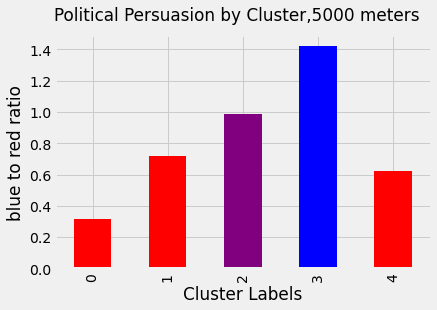

In [61]:
#graphing the results of above, just the cluster ratios.
plt.style.use('fivethirtyeight')
test2.plot(kind='bar',x = 'Cluster Labels',y='vote ratio blue over red',color=('red','red','purple','blue','red'))
plt.suptitle('Political Persuasion by Cluster,5000 meters')
plt.xlabel('Cluster Labels')
plt.ylabel('blue to red ratio')

In [62]:
#ttests for these ratios:
#no significant difference between 0 and 1
g5000_0 = georgia_analysis[georgia_analysis['Cluster Labels']==0]
g5000_0
g5000_1 = georgia_analysis[georgia_analysis['Cluster Labels']==1]
welchs = stats.ttest_ind(g5000_0['vote ratio blue over red'], g5000_1['vote ratio blue over red'], equal_var=False)
print('cluster 0 and 1:')
print(welchs)
g5000_2 = georgia_analysis[georgia_analysis['Cluster Labels']==2]
welchs2 = stats.ttest_ind(g5000_0['vote ratio blue over red'], g5000_2['vote ratio blue over red'], equal_var=False)
print('cluster 0 and 2:')
print(welchs2)
g5000_3 = georgia_analysis[georgia_analysis['Cluster Labels']==3]
welchs3 = stats.ttest_ind(g5000_0['vote ratio blue over red'], g5000_3['vote ratio blue over red'], equal_var=False)
print('cluster 0 and 3:')
print(welchs3)
g5000_4 = georgia_analysis[georgia_analysis['Cluster Labels']==4]
welchs4 = stats.ttest_ind(g5000_0['vote ratio blue over red'], g5000_4['vote ratio blue over red'], equal_var=False)
print('cluster 0 and 4:')
print(welchs4)

cluster 0 and 1:
Ttest_indResult(statistic=-3.0186581167402746, pvalue=0.10768516042026476)
cluster 0 and 2:
Ttest_indResult(statistic=-3.3699397180802526, pvalue=0.08965312604125796)
cluster 0 and 3:
Ttest_indResult(statistic=-8.628313057461764, pvalue=0.03246094751725442)
cluster 0 and 4:
Ttest_indResult(statistic=-2.01866208525217, pvalue=0.18285166884691786)


In [63]:
welchs1A = stats.ttest_ind(g5000_1['vote ratio blue over red'], g5000_2['vote ratio blue over red'], equal_var=False)
print('cluster 1 and 2:')
print(welchs1A)
welchs2A = stats.ttest_ind(g5000_1['vote ratio blue over red'], g5000_3['vote ratio blue over red'], equal_var=False)
print('cluster 1 and 3:')
print(welchs2A)
welchs3A = stats.ttest_ind(g5000_1['vote ratio blue over red'], g5000_4['vote ratio blue over red'], equal_var=False)
print('cluster 1 and 4:')
print(welchs3A)
welchs4A = stats.ttest_ind(g5000_2['vote ratio blue over red'], g5000_3['vote ratio blue over red'], equal_var=False)
print('cluster 2 and 3:')
print(welchs4A)
welchs5A = stats.ttest_ind(g5000_2['vote ratio blue over red'], g5000_4['vote ratio blue over red'], equal_var=False)
print('cluster 2 and 4:')
print(welchs5A)
welchs6A = stats.ttest_ind(g5000_3['vote ratio blue over red'], g5000_4['vote ratio blue over red'], equal_var=False)
print('cluster 3 and 4:')
print(welchs6A)


cluster 1 and 2:
Ttest_indResult(statistic=-1.5270407092431701, pvalue=0.31744406534965)
cluster 1 and 3:
Ttest_indResult(statistic=-8.043207295352605, pvalue=0.0002095822059787971)
cluster 1 and 4:
Ttest_indResult(statistic=0.7523599664979111, pvalue=0.5286271595956512)
cluster 2 and 3:
Ttest_indResult(statistic=-2.5258532421321367, pvalue=0.2003911541317578)
cluster 2 and 4:
Ttest_indResult(statistic=1.8784106342739257, pvalue=0.22433412871902061)
cluster 3 and 4:
Ttest_indResult(statistic=6.827038307246339, pvalue=0.03876724899263728)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

C1 v.s. C3: Welch's t-test independent samples with Bonferroni correction, P_val=2.096e-04 stat=-8.043e+00


(<AxesSubplot:xlabel='Clusters', ylabel='vote ratio blue over red'>,
 [<statannot.StatResult.StatResult at 0x7f3ed20f54e0>])

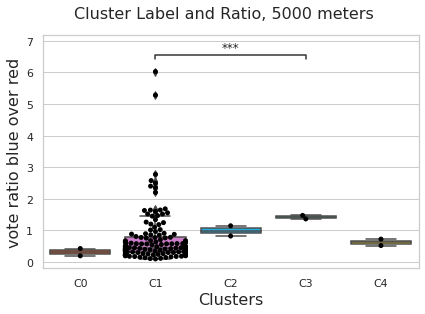

In [64]:
g5000_0box = g5000_0[['vote ratio blue over red']]
g5000_1box = g5000_1[['vote ratio blue over red']]
g5000_2box = g5000_2[['vote ratio blue over red']]
g5000_3box = g5000_3[['vote ratio blue over red']]
g5000_4box = g5000_4[['vote ratio blue over red']]
g5000box = pd.concat([g5000_0box,g5000_1box,g5000_2box,g5000_3box,g5000_4box],axis=1)
g5000box.columns = ['C0','C1','C2','C3','C4']
g5000box.head()
sns.set()
sns.set_style('whitegrid')
ax=sns.boxplot(data=g5000box,palette=['orangered','orchid','deepskyblue','springgreen','gold'])
plt.xlabel('Clusters',fontsize=16)
plt.ylabel('vote ratio blue over red',fontsize=16)
plt.suptitle('Cluster Label and Ratio, 5000 meters',fontsize=16)
sns.swarmplot(data=g5000box,palette=['black'])
from statannot import add_stat_annotation
add_stat_annotation(ax, data=g5000box,box_pairs=[("C1","C3")],test ='t-test_welch',text_format='star',verbose=2)

In [65]:
#F_Oneway ANOVA method doesn't reveal overall significance, it is a stricter measure
from scipy.stats import f_oneway
print('5000 meter queries and difference between clusters:')
f_oneway(g5000_0['vote ratio blue over red'],g5000_1['vote ratio blue over red'],g5000_2['vote ratio blue over red'],g5000_3['vote ratio blue over red'],g5000_4['vote ratio blue over red'])

5000 meter queries and difference between clusters:


F_onewayResult(statistic=0.5870640594175687, pvalue=0.6725100488843546)

<H2>GEORGIA 500 METERS</H2>

In [66]:
#this is 500 meters search for all counties
g501_analysis = pd.read_csv('g501mergedanal')

In [67]:
#47 counties
#103 venue categories
#205 total venues
g500_venues = pd.read_csv('g500.csv')
g500_venues.head()
g500_venues.columns
g500_venues.drop(['Unnamed: 0'],axis=1,inplace=True)
g500_venues.shape
len(g500_venues['County'].unique())
len(g500_venues['Venue Category'].unique())
g500_venues.shape

(205, 7)

In [68]:
#georgia_venues500 = getNearbyVenues(names=new['County'],
#latitudes=new['Lat'],
#longitudes=new['Long'])

In [69]:
#georgia_venues500.shape

In [70]:
#g500 = georgia_venues500.to_csv(r'g500.csv',index='False')

In [71]:
#only 47 counties meet hte 500m critiera
g500_venues['County'].value_counts()
len(g500_venues['Venue Category'].unique())
len(g500_venues['County'].unique())
g500_venues.head()
g501 = g500_venues

In [72]:
# one hot encoding for venue categories
g501 = g500_venues
g501_onehot = pd.get_dummies(g501[['Venue Category']], prefix="", prefix_sep="")
g501_onehot.head()
g501_onehot.shape
g501_onehot.head()
g501_onehot['County'] = g501['County']
cols = list(g501_onehot.columns.values)
g501_onehot.rename(columns={"Women's Store":'Womenstore'},inplace=True)
g501_onehot.columns.get_loc('County')

103

In [73]:
fixed_columns = [g501_onehot.columns[103]] + list(g501_onehot.columns[:103])
g501_onehot = g501_onehot[fixed_columns]
g501_onehot.head()

,County,Advertising Agency,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bank,Bar,Baseball Field,Big Box Store,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Business Service,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop,Farm,Fast Food Restaurant,Financial or Legal Service,Flower Shop,Food,Food & Drink Shop,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Hobby Shop,Home Service,Hotel,Hunting Supply,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Lake,Lawyer,Light Rail Station,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Moving Target,Multiplex,New American Restaurant,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Rental Car Location,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Supplement Shop,Tex-Mex Restaurant,Thai Restaurant,Train Station,Video Store,Wine Bar,Womenstore
0,Barrow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barrow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barrow,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Barrow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Barrow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
g501_grouped = g501_onehot.groupby('County').mean().reset_index()
g501_grouped.head()

,County,Advertising Agency,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bank,Bar,Baseball Field,Big Box Store,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Business Service,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop,Farm,Fast Food Restaurant,Financial or Legal Service,Flower Shop,Food,Food & Drink Shop,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Hobby Shop,Home Service,Hotel,Hunting Supply,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Lake,Lawyer,Light Rail Station,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Moving Target,Multiplex,New American Restaurant,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Rental Car Location,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Supplement Shop,Tex-Mex Restaurant,Thai Restaurant,Train Station,Video Store,Wine Bar,Womenstore
0,Barrow,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bibb,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.250000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Butts,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Carroll,0.0,0.111111,0.0,0.0,0.0,0.111111,0.0,0.00,0.0,0.0,0.111111,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Catoosa,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [76]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['County']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
counties_venues_sorted = pd.DataFrame(columns=columns)
counties_venues_sorted['County'] = g501_grouped['County']

for ind in np.arange(g501_grouped.shape[0]):
    counties_venues_sorted.iloc[ind, 1:] = return_most_common_venues(g501_grouped.iloc[ind, :], num_top_venues)

counties_venues_sorted.head()

,County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrow,Gift Shop,Scenic Lookout,American Restaurant,Gas Station,Liquor Store,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop
1,Bibb,Multiplex,Hardware Store,Bar,Restaurant,Womenstore,Fast Food Restaurant,Dance Studio,Department Store,Dessert Shop,Disc Golf
2,Butts,Performing Arts Venue,Grocery Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
3,Carroll,Fried Chicken Joint,Discount Store,Plaza,Brazilian Restaurant,Bookstore,Hotel,Restaurant,BBQ Joint,American Restaurant,Fast Food Restaurant
4,Catoosa,Financial or Legal Service,Womenstore,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop


In [77]:
# set number of clusters
kclusters = 5

g501_grouped_clustering = g501_grouped.drop('County', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(g501_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
g501_grouped_clustering.head()

,Advertising Agency,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bank,Bar,Baseball Field,Big Box Store,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Business Service,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop,Farm,Fast Food Restaurant,Financial or Legal Service,Flower Shop,Food,Food & Drink Shop,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Hobby Shop,Home Service,Hotel,Hunting Supply,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Lake,Lawyer,Light Rail Station,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Moving Target,Multiplex,New American Restaurant,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Rental Car Location,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Supplement Shop,Tex-Mex Restaurant,Thai Restaurant,Train Station,Video Store,Wine Bar,Womenstore
0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.250000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.111111,0.0,0.0,0.0,0.111111,0.0,0.00,0.0,0.0,0.111111,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# add clustering labels
counties_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
counties_venues_sorted.head()

,Cluster Labels,County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Barrow,Gift Shop,Scenic Lookout,American Restaurant,Gas Station,Liquor Store,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop
1,4,Bibb,Multiplex,Hardware Store,Bar,Restaurant,Womenstore,Fast Food Restaurant,Dance Studio,Department Store,Dessert Shop,Disc Golf
2,4,Butts,Performing Arts Venue,Grocery Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
3,4,Carroll,Fried Chicken Joint,Discount Store,Plaza,Brazilian Restaurant,Bookstore,Hotel,Restaurant,BBQ Joint,American Restaurant,Fast Food Restaurant
4,4,Catoosa,Financial or Legal Service,Womenstore,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop


In [79]:
g501_merged = georgiallsmall
# merge the postal code lat long dataframe with the top ten venue data to add latitude/longitude for each neighborhood
g501_merged = g501_merged.join(counties_venues_sorted.set_index('County'), on='County')
g501_merged.dropna().head()
#drop nAn values
g501_merged = g501_merged.dropna()
g501_merged['Cluster Labels']=g501_merged['Cluster Labels'].astype(int)
g501_merged['Lat'] = g501_merged['Lat'].astype(float)
g501_merged['Long'] = g501_merged['Long'].astype(float)

In [80]:
g501_merged.head()

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,33.287851,-83.957170,Butts,4,Performing Arts Venue,Grocery Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
6,34.572189,-84.002656,Lumpkin,4,Bus Station,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
7,33.993196,-83.712755,Barrow,4,Gift Shop,Scenic Lookout,American Restaurant,Gas Station,Liquor Store,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop
8,33.033510,-85.028337,Troup,4,Train Station,Southern / Soul Food Restaurant,Brewery,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf
9,31.973951,-81.093970,Chatham,4,Gun Range,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop


In [81]:
#Using geocode and Nominatim to locate Georgia
address = 'Georgia,USA'

geolocator = Nominatim(user_agent="ga_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates for Georgia are {}, {}.'.format(latitude, longitude))

The geographical coordinates for Georgia are 32.3293809, -83.1137366.


In [82]:
g501_merged

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,33.287851,-83.957170,Butts,4,Performing Arts Venue,Grocery Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
6,34.572189,-84.002656,Lumpkin,4,Bus Station,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
7,33.993196,-83.712755,Barrow,4,Gift Shop,Scenic Lookout,American Restaurant,Gas Station,Liquor Store,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop
8,33.033510,-85.028337,Troup,4,Train Station,Southern / Soul Food Restaurant,Brewery,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf
9,31.973951,-81.093970,Chatham,4,Gun Range,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop
10,33.555049,-83.850187,Newton,3,Video Store,Discount Store,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Donut Shop
13,31.457438,-83.526594,Tift,4,Fast Food Restaurant,Mexican Restaurant,Hotel,Sandwich Place,Sporting Goods Shop,Department Store,Clothing Store,Japanese Restaurant,Italian Restaurant,Fried Chicken Joint
17,33.260877,-84.284151,Spalding,2,American Restaurant,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
18,31.776881,-84.436922,Terrell,4,Football Stadium,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
21,34.881725,-83.402076,Rabun,4,American Restaurant,Fast Food Restaurant,Sports Bar,Bookstore,Flower Shop,Coffee Shop,Gas Station,Café,Discount Store,Donut Shop


In [83]:
# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(g501_merged['Lat'], g501_merged['Long'], g501_merged['County'], g501_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [84]:
#red
g0 = g501_merged.loc[g501_merged['Cluster Labels'] == 0, g501_merged.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13] + list(range(5, g501_merged.shape[1]))]]
g0.shape
g0

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
80,32.509958,-84.877043,Muscogee,0,Business Service,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
94,31.807229,-81.456256,Liberty,0,Business Service,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop


In [85]:
#purple
g1 = g501_merged.loc[g501_merged['Cluster Labels'] == 1, g501_merged.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13] + list(range(5, g501_merged.shape[1]))]]
g1.shape
g1

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,34.225546,-84.125017,Forsyth,1,Baseball Field,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
106,33.321767,-83.372841,Putnam,1,Baseball Field,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
112,33.316434,-83.688090,Jasper,1,Caribbean Restaurant,Baseball Field,Womenstore,Financial or Legal Service,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Baseball Field,Womenstore,Financial or Legal Service,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop


In [86]:
#blue
g2 = g501_merged.loc[g501_merged['Cluster Labels'] == 2, g501_merged.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13] + list(range(5, g501_merged.shape[1]))]]
g2

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,33.260877,-84.284151,Spalding,2,American Restaurant,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
33,30.878344,-84.579070,Decatur,2,Home Service,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
82,34.916706,-83.737279,Towns,2,Dance Studio,Home Service,Womenstore,Financial or Legal Service,Cupcake Shop,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Home Service,Womenstore,Financial or Legal Service,Cupcake Shop,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
89,33.790283,-84.466990,Fulton,2,Home Service,Moving Target,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Moving Target,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store
99,32.969536,-82.795899,Washington,2,Garden Center,Home Service,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Home Service,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store
102,33.941482,-84.576684,Cobb,2,American Restaurant,Home Service,Pool,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Home Service,Pool,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf
103,34.316890,-83.819679,Hall,2,Video Store,Pharmacy,Home Service,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Pharmacy,Home Service,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf


In [87]:
#green
g3 = g501_merged.loc[g501_merged['Cluster Labels'] == 3, g501_merged.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13] + list(range(5, g501_merged.shape[1]))]]
g3

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,33.555049,-83.850187,Newton,3,Video Store,Discount Store,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Donut Shop,Discount Store,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Donut Shop
22,30.863682,-83.919313,Thomas,3,Video Store,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
149,30.833857,-83.267708,Lowndes,3,Discount Store,Seafood Restaurant,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Donut Shop,Seafood Restaurant,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Donut Shop


In [88]:
#cluster 4 is yellow here
g4 = g501_merged.loc[g501_merged['Cluster Labels'] == 4, g501_merged.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13] + list(range(5, g501_merged.shape[1]))]]
g4

,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,33.287851,-83.957170,Butts,4,Performing Arts Venue,Grocery Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Grocery Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
6,34.572189,-84.002656,Lumpkin,4,Bus Station,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
7,33.993196,-83.712755,Barrow,4,Gift Shop,Scenic Lookout,American Restaurant,Gas Station,Liquor Store,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Scenic Lookout,American Restaurant,Gas Station,Liquor Store,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop
8,33.033510,-85.028337,Troup,4,Train Station,Southern / Soul Food Restaurant,Brewery,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Southern / Soul Food Restaurant,Brewery,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf
9,31.973951,-81.093970,Chatham,4,Gun Range,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop
13,31.457438,-83.526594,Tift,4,Fast Food Restaurant,Mexican Restaurant,Hotel,Sandwich Place,Sporting Goods Shop,Department Store,Clothing Store,Japanese Restaurant,Italian Restaurant,Fried Chicken Joint,Mexican Restaurant,Hotel,Sandwich Place,Sporting Goods Shop,Department Store,Clothing Store,Japanese Restaurant,Italian Restaurant,Fried Chicken Joint
18,31.776881,-84.436922,Terrell,4,Football Stadium,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop
21,34.881725,-83.402076,Rabun,4,American Restaurant,Fast Food Restaurant,Sports Bar,Bookstore,Flower Shop,Coffee Shop,Gas Station,Café,Discount Store,Donut Shop,Fast Food Restaurant,Sports Bar,Bookstore,Flower Shop,Coffee Shop,Gas Station,Café,Discount Store,Donut Shop
30,33.771547,-84.226432,DeKalb,4,Light Rail Station,Athletics & Sports,Bus Station,Park,Womenstore,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Athletics & Sports,Bus Station,Park,Womenstore,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf
38,33.701828,-84.767973,Douglas,4,Outdoors & Recreation,Pizza Place,BBQ Joint,Discount Store,Fast Food Restaurant,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Pizza Place,BBQ Joint,Discount Store,Fast Food Restaurant,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop


<H2>GEORGIA 500 METERS ANALYSIS</H2>

In [89]:
g501_analysis = pd.read_csv('g501mergedanal')
g501_analysis.head()

,Unnamed: 0,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red,Skew
0,0,33.287851,-83.957170,Butts,4,Performing Arts Venue,Grocery Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,8403,3271,11674,0.389266,Red
1,1,34.572189,-84.002656,Lumpkin,4,Bus Station,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,12160,3122,15282,0.256743,Red
2,2,33.993196,-83.712755,Barrow,4,Gift Shop,Scenic Lookout,American Restaurant,Gas Station,Liquor Store,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,26804,10453,37257,0.389979,Red
3,3,33.033510,-85.028337,Troup,4,Train Station,Southern / Soul Food Restaurant,Brewery,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,18146,11585,29731,0.638433,Red
4,4,31.973951,-81.093970,Chatham,4,Gun Range,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop,53191,78181,131372,1.469816,Blue


In [90]:
#47 counties had results, the length is 47 as well so this analysis is all unique ones.
g501_analysis
len(g501_analysis['County'])
g501_analysis.sort_values(by='County')

,Unnamed: 0,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red,Skew
2,2,33.993196,-83.712755,Barrow,4,Gift Shop,Scenic Lookout,American Restaurant,Gas Station,Liquor Store,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,26804,10453,37257,0.389979,Red
18,18,32.806498,-83.697420,Bibb,4,Multiplex,Hardware Store,Bar,Restaurant,Womenstore,Fast Food Restaurant,Dance Studio,Department Store,Dessert Shop,Disc Golf,26506,43234,69740,1.631102,Blue
0,0,33.287851,-83.957170,Butts,4,Performing Arts Venue,Grocery Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,8403,3271,11674,0.389266,Red
45,45,33.582798,-85.079763,Carroll,4,Fried Chicken Joint,Discount Store,Plaza,Brazilian Restaurant,Bookstore,Hotel,Restaurant,BBQ Joint,American Restaurant,Fast Food Restaurant,37476,16238,53714,0.433291,Red
15,15,34.903657,-85.138247,Catoosa,4,Financial or Legal Service,Womenstore,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop,25167,6932,32099,0.275440,Red
4,4,31.973951,-81.093970,Chatham,4,Gun Range,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Fabric Shop,53191,78181,131372,1.469816,Blue
24,24,34.475015,-85.345291,Chattooga,4,Sandwich Place,Grocery Store,Pharmacy,Bank,Pizza Place,Southern / Soul Food Restaurant,Womenstore,Cupcake Shop,Dance Studio,Department Store,8064,1854,9918,0.229911,Red
36,36,33.951169,-83.367329,Clarke,4,Park,American Restaurant,Fried Chicken Joint,Liquor Store,Rental Car Location,Ice Cream Shop,Breakfast Spot,Rock Club,Fabric Shop,Cupcake Shop,14412,35969,50381,2.495767,Blue
32,32,33.941482,-84.576684,Cobb,2,American Restaurant,Home Service,Pool,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,165178,221730,386908,1.342370,Blue
43,43,31.188390,-83.768848,Colquitt,4,Pizza Place,Movie Theater,Mexican Restaurant,Womenstore,Farm,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,11776,4185,15961,0.355384,Red


Text(0, 0.5, 'vote ratio blue over red')

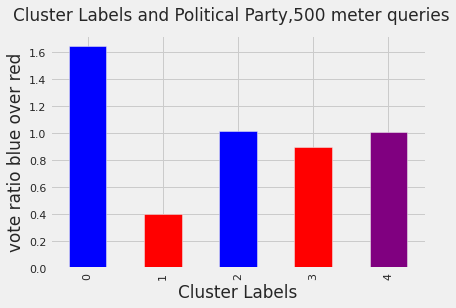

In [91]:
g501_analysis.sort_values(by =['Totall minus liber'])
#what are the most common venues?
g501_analysis.sort_values(by = '1st Most Common Venue')
g501_analysis.sort_values(by=['Cluster Labels','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])
resultdf = g501_analysis.groupby(['Cluster Labels'])['vote ratio blue over red'].mean()
resultdf.reset_index()
#let's just look at the cluster ratios by themselves on a bar graph
plt.style.use('fivethirtyeight')
resultdf.plot(kind='bar',x='Cluster Labels',y='vote ratio blue over red',color=('blue','red','blue','red','purple'))
plt.suptitle('Cluster Labels and Political Party,500 meter queries')
plt.ylabel('vote ratio blue over red')

In [92]:
g501_analysis.groupby('Cluster Labels')['Skew'].value_counts()

Cluster Labels  Skew
0               Blue     2
1               Red      3
2               Red      4
                Blue     3
3               Red      2
                Blue     1
4               Red     21
                Blue    11
Name: Skew, dtype: int64

In [93]:
#how many counties in each cluster label
g501_analysis.value_counts('Cluster Labels')

Cluster Labels
4    32
2     7
3     3
1     3
0     2
dtype: int64

In [94]:
#range of population in Totall minus liber is still quite wide (3805 to 513000)
g501_analysis.describe()

,Unnamed: 0,Lat,Long,Cluster Labels,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,23.000000,33.163661,-83.801690,3.276596,28520.148936,38737.553191,67257.702128,0.993054
std,13.711309,1.211749,0.905213,1.192406,38156.410803,80666.048418,114097.069968,0.969022
min,0.000000,30.833857,-85.345291,0.000000,1159.000000,1387.000000,3805.000000,0.175653
25%,11.500000,32.341070,-84.302002,2.500000,7709.000000,3053.500000,10909.000000,0.363511
50%,23.000000,33.452994,-83.919313,4.000000,13012.000000,8708.000000,29731.000000,0.619886
75%,34.500000,33.977458,-83.387459,4.000000,28150.500000,30512.000000,53681.000000,1.461163
max,46.000000,34.916706,-81.093970,4.000000,166016.000000,377484.000000,513624.000000,5.277411


In [95]:
#political ratio for columns
g501_means = g501_analysis.groupby('Cluster Labels')['vote ratio blue over red'].mean()
g501_means

Cluster Labels
0    1.644694
1    0.404691
2    1.017460
3    0.901017
4    1.010776
Name: vote ratio blue over red, dtype: float64

In [96]:
#ttests for these ratios:
g501_0 = g501_analysis[g501_analysis['Cluster Labels']==0]
g501_0
g501_1 = g501_analysis[g501_analysis['Cluster Labels']==1]
welchs = stats.ttest_ind(g501_0['vote ratio blue over red'], g501_1['vote ratio blue over red'], equal_var=False)
print('cluster 0 and 1:')
print(welchs)
g501_2 = g501_analysis[g501_analysis['Cluster Labels']==2]
welchs2 = stats.ttest_ind(g501_0['vote ratio blue over red'], g501_2['vote ratio blue over red'], equal_var=False)
print('cluster 0 and 2:')
print(welchs2)
g501_3 = g501_analysis[g501_analysis['Cluster Labels']==3]
welchs3 = stats.ttest_ind(g501_0['vote ratio blue over red'], g501_3['vote ratio blue over red'], equal_var=False)
print('cluster 0 and 3:')
print(welchs3)
g501_4 = g501_analysis[g501_analysis['Cluster Labels']==4]
welchs4 = stats.ttest_ind(g501_0['vote ratio blue over red'], g501_4['vote ratio blue over red'], equal_var=False)
print('cluster 0 and 4:')
print(welchs4)

cluster 0 and 1:
Ttest_indResult(statistic=22.104766929888925, pvalue=0.0020194430307044816)
cluster 0 and 2:
Ttest_indResult(statistic=1.9357029215797892, pvalue=0.10103905181280985)
cluster 0 and 3:
Ttest_indResult(statistic=4.217720775184167, pvalue=0.05185916064015451)
cluster 0 and 4:
Ttest_indResult(statistic=3.2977924589994188, pvalue=0.0024508036696090155)


In [97]:
#continued t_tests
welchs1B = stats.ttest_ind(g501_1['vote ratio blue over red'], g501_2['vote ratio blue over red'], equal_var=False)
print('cluster 1 and 2:')
print(welchs)
welchs2B = stats.ttest_ind(g501_1['vote ratio blue over red'], g501_3['vote ratio blue over red'], equal_var=False)
print('cluster 1 and 3:')
print(welchs2B)
welchs3B = stats.ttest_ind(g501_1['vote ratio blue over red'], g501_4['vote ratio blue over red'], equal_var=False)
print('cluster 1 and 4:')
print(welchs3B)
welchs4B = stats.ttest_ind(g501_2['vote ratio blue over red'], g501_4['vote ratio blue over red'], equal_var=False)
print('cluster 2 and 4:')
print(welchs4B)
welchs5B = stats.ttest_ind(g501_2['vote ratio blue over red'], g501_3['vote ratio blue over red'],equal_var=False)
print('cluster 2 and 3:')
print(welchs5B)
welchs6B = stats.ttest_ind(g501_3['vote ratio blue over red'], g501_4['vote ratio blue over red'], equal_var=False)
print('cluster 3 and 4:')
print(welchs6B)

cluster 1 and 2:
Ttest_indResult(statistic=22.104766929888925, pvalue=0.0020194430307044816)
cluster 1 and 3:
Ttest_indResult(statistic=-2.6826619742494042, pvalue=0.09511428458415247)
cluster 1 and 4:
Ttest_indResult(statistic=-3.0269937967897063, pvalue=0.004779075259500722)
cluster 2 and 4:
Ttest_indResult(statistic=0.01774325056994692, pvalue=0.9861699281850497)
cluster 2 and 3:
Ttest_indResult(statistic=0.3156573365117842, pvalue=0.7603597918513558)
cluster 3 and 4:
Ttest_indResult(statistic=-0.4208015114700335, pvalue=0.684013365930866)


In [98]:
#F_Oneway ANOVA method doesn't reveal overall significance, it is a stricter measure
from scipy.stats import f_oneway
f_oneway(g501_0['vote ratio blue over red'],g501_1['vote ratio blue over red'],g501_2['vote ratio blue over red'],g501_3['vote ratio blue over red'],g501_4['vote ratio blue over red'])

F_onewayResult(statistic=0.49041541760460394, pvalue=0.7427163763273352)

In [99]:
g501_0.sort_values(by = ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])

,Unnamed: 0,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red,Skew
21,21,32.509958,-84.877043,Muscogee,0,Business Service,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,30018,49425,79443,1.646512,Blue
29,29,31.807229,-81.456256,Liberty,0,Business Service,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,7944,13051,20995,1.642875,Blue


In [100]:
g501_1.sort_values(by = ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])

,Unnamed: 0,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red,Skew
14,14,34.225546,-84.125017,Forsyth,1,Baseball Field,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,85081,42177,127258,0.495728,Red
35,35,33.321767,-83.372841,Putnam,1,Baseball Field,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,8291,3448,11739,0.415873,Red
37,37,33.316434,-83.688090,Jasper,1,Caribbean Restaurant,Baseball Field,Womenstore,Financial or Legal Service,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,5822,1761,7583,0.302473,Red


In [101]:
g501_2.sort_values(by = ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])
g501_2.sort_values(by='vote ratio blue over red')
g501_2a = g501_2[g501_2['County']!='Fulton']
g501_2a.sort_values(by='vote ratio blue over red')
g501_2.sort_values(by='vote ratio blue over red')
g501_2.head()

,Unnamed: 0,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red,Skew
7,7,33.260877,-84.284151,Spalding,2,American Restaurant,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,18057,11784,29841,0.652600,Red
12,12,30.878344,-84.579070,Decatur,2,Home Service,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,6758,4780,11538,0.707310,Red
23,23,34.916706,-83.737279,Towns,2,Dance Studio,Home Service,Womenstore,Financial or Legal Service,Cupcake Shop,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,6384,1550,7934,0.242794,Red
26,26,33.790283,-84.466990,Fulton,2,Home Service,Moving Target,Womenstore,Fast Food Restaurant,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,136140,377484,513624,2.772763,Blue
31,31,32.969536,-82.795899,Washington,2,Garden Center,Home Service,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,4663,4730,9393,1.014368,Blue


In [102]:
g501_3.sort_values(by = ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])

,Unnamed: 0,Lat,Long,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total Votes Red,Total Votes Blue,Totall minus liber,vote ratio blue over red,Skew
44,44,30.833857,-83.267708,Lowndes,3,Discount Store,Seafood Restaurant,Womenstore,Convenience Store,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Donut Shop,25691,20117,45808,0.783037,Red
5,5,33.555049,-83.850187,Newton,3,Video Store,Discount Store,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Donut Shop,23867,29781,53648,1.247790,Blue
10,10,30.863682,-83.919313,Thomas,3,Video Store,Womenstore,Financial or Legal Service,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,12954,8708,21662,0.672225,Red


In [103]:
g501_4.sort_values(by = ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])
g501_4a = g501_4[g501_4['County']!='DeKalb']
g501_4.value_counts(['3rd Most Common Venue'])

3rd Most Common Venue     
Financial or Legal Service    8
Cupcake Shop                  3
Convenience Store             2
Cosmetics Shop                2
Wine Bar                      1
BBQ Joint                     1
Bar                           1
Baseball Field                1
Brewery                       1
Bus Station                   1
Business Service              1
Fast Food Restaurant          1
Sports Bar                    1
Fried Chicken Joint           1
Gym                           1
Hotel                         1
Mexican Restaurant            1
Pharmacy                      1
Plaza                         1
Salon / Barbershop            1
American Restaurant           1
dtype: int64

In [104]:
import seaborn as sns
g501_0.reset_index(drop=True)
g501_1 = g501_1['vote ratio blue over red']
g501_1

14    0.495728
35    0.415873
37    0.302473
Name: vote ratio blue over red, dtype: float64

In [105]:
#with outliers removed from cluster 4
welchs4a = stats.ttest_ind(g501_0['vote ratio blue over red'], g501_4a['vote ratio blue over red'], equal_var=False)
print('cluster 0 and 4a:')
print(welchs4a)

cluster 0 and 4a:
Ttest_indResult(statistic=5.567067775202933, pvalue=4.695340855399106e-06)


In [106]:
#outliers removed from cluster 2
welchs2a = stats.ttest_ind(g501_0['vote ratio blue over red'], g501_2a['vote ratio blue over red'], equal_var=False)
print('cluster 0 and 2a:')
print(welchs2a)

cluster 0 and 2a:
Ttest_indResult(statistic=5.579504670156307, pvalue=0.002547086489531169)


In [107]:
g501_1 = g501_analysis[g501_analysis['Cluster Labels']==1]

In [108]:
data = pd.concat([g501_0['vote ratio blue over red'],g501_1['vote ratio blue over red'],g501_2['vote ratio blue over red'],g501_3['vote ratio blue over red'],g501_4['vote ratio blue over red']],axis=1)
data.columns = ['Cluster0_ratio','Cluster1_ratio','Cluster2_ratio','Cluster3_ratio','Cluster4_ratio']
data

,Cluster0_ratio,Cluster1_ratio,Cluster2_ratio,Cluster3_ratio,Cluster4_ratio
0,NaN,NaN,NaN,NaN,0.389266
1,NaN,NaN,NaN,NaN,0.256743
2,NaN,NaN,NaN,NaN,0.389979
3,NaN,NaN,NaN,NaN,0.638433
4,NaN,NaN,NaN,NaN,1.469816
5,NaN,NaN,NaN,1.247790,NaN
6,NaN,NaN,NaN,NaN,0.493509
7,NaN,NaN,0.652600,NaN,NaN
8,NaN,NaN,NaN,NaN,1.185629
9,NaN,NaN,NaN,NaN,0.265454


In [109]:
pip install statannot

Note: you may need to restart the kernel to use updated packages.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Cluster0_ratio v.s. Cluster1_ratio: Welch's t-test independent samples with Bonferroni correction, P_val=6.058e-03 stat=2.210e+01
Cluster1_ratio v.s. Cluster4_ratio: Welch's t-test independent samples with Bonferroni correction, P_val=1.434e-02 stat=-3.027e+00
Cluster0_ratio v.s. Cluster4_ratio: Welch's t-test independent samples with Bonferroni correction, P_val=7.352e-03 stat=3.298e+00


(<AxesSubplot:xlabel='Clusters', ylabel='Vote ratio blue over red'>,
  <statannot.StatResult.StatResult at 0x7f3efe3f14e0>])

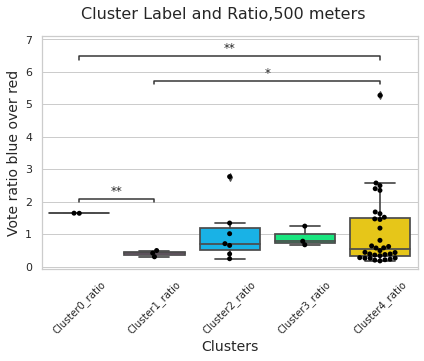

In [110]:
sns.set()
sns.set_style('whitegrid')
ax = sns.boxplot(data=data,palette=['orangered','orchid','deepskyblue','springgreen','gold'],linewidth='1.75',saturation=0.8)
plt.suptitle('Cluster Label and Ratio,500 meters',fontsize=16)
plt.xlabel('Clusters',fontsize=14)
plt.ylabel('Vote ratio blue over red',fontsize=14)
plt.xticks(rotation=45,fontsize=10)
sns.swarmplot(data=data,palette=["black"])
labels=['Cluster0_ratio','Cluster1_ratio','Cluster2_ratio','Cluster3_ratio','Cluster 4_ratio']
from statannot import add_stat_annotation
add_stat_annotation(ax, data=data,box_pairs=[("Cluster0_ratio", "Cluster4_ratio"),("Cluster0_ratio","Cluster1_ratio"),("Cluster1_ratio","Cluster4_ratio")],test ='t-test_welch', text_format='star',verbose=2)